In [1]:
import os
import numpy as np
from PIL import Image
from google.colab import drive

import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [2]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
drive.mount('/content/drive', force_remount = True)


Mounted at /content/drive


In [4]:
# Set the paths to the train, test, and validation directories
train_dir = '/content/drive/MyDrive/archive/Potato (1)/Train'
test_dir = '/content/drive/MyDrive/archive/Potato (1)/Test'
val_dir = '/content/drive/MyDrive/archive/Potato (1)/Val'



In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
print(os.listdir(train_dir))

['Late Blight', 'Early Blight', 'Healthy']


In [7]:
for folderName in os.listdir(train_dir):
    print(folderName + '\n')
    # for fileName in os.listdir(train_dir + '/' + folderName):
        # print(fileName)

Late Blight

Early Blight

Healthy



In [8]:
def img_to_array(dir):
    images = []
    labels = []

    for folderName in os.listdir(dir):
        folder_dir = os.path.join(dir, folderName)
        if os.path.isdir(folder_dir):
            for fileName in os.listdir(folder_dir):
                if fileName.endswith('.JPG'):
                    img = Image.open(os.path.join(folder_dir, fileName))
                    resized_img = img.resize((128, 128))
                    img_arr = np.array(resized_img)
                    images.append(img_arr)
                    labels.append(folderName)

    images = np.array(images)
    labels = np.array(labels)

    print(images.shape, labels.shape)

    return images, labels




In [9]:
# Read and store images from the train directory
train_images, train_labels = img_to_array(train_dir)

# Read and store images from the test directory
test_images, test_labels = img_to_array(test_dir)

# Read and store images from the validation directory
val_images, val_labels = img_to_array(val_dir)

(5702, 128, 128, 3) (5702,)
(144, 128, 128, 3) (144,)
(1282, 128, 128, 3) (1282,)


In [10]:
print(train_labels)

['Late Blight' 'Late Blight' 'Late Blight' ... 'Healthy' 'Healthy'
 'Healthy']


In [11]:
# Normalize pixel values to the range of 0-1
train_images = train_images.astype('float32') / 255.0
val_images = val_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [12]:
# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the labels
train_labels = encoder.fit_transform([[label] for label in train_labels]).toarray()
test_labels = encoder.fit_transform([[label] for label in test_labels]).toarray()
val_labels = encoder.fit_transform([[label] for label in val_labels]).toarray()

In [13]:
print(train_labels)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [14]:
# Define the number of classes
num_classes = 3

# Create a CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=2)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# Train the model with callbacks
history = model.fit(train_images, train_labels, epochs=20, batch_size=32,
                    validation_data=(val_images, val_labels),
                    callbacks=[early_stopping, reduce_lr, model_checkpoint])

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Retrieve training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Convert training history to lists
training_loss_list = list(training_loss)
validation_loss_list = list(validation_loss)
training_accuracy_list = list(training_accuracy)
validation_accuracy_list = list(validation_accuracy)



Epoch 1/20
179/179 [==============================] - 10s 27ms/step - loss: 0.4145 - accuracy: 0.8285 - val_loss: 0.2666 - val_accuracy: 0.9017 - lr: 0.0010
Epoch 2/20
  5/179 [..............................] - ETA: 2s - loss: 0.1349 - accuracy: 0.9500

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


179/179 [==============================] - 3s 18ms/step - loss: 0.1337 - accuracy: 0.9490 - val_loss: 0.1544 - val_accuracy: 0.9399 - lr: 0.0010
Epoch 3/20
179/179 [==============================] - 3s 18ms/step - loss: 0.0849 - accuracy: 0.9695 - val_loss: 0.0840 - val_accuracy: 0.9672 - lr: 0.0010
Epoch 4/20
179/179 [==============================] - 3s 18ms/step - loss: 0.0649 - accuracy: 0.9753 - val_loss: 0.1216 - val_accuracy: 0.9540 - lr: 0.0010
Epoch 5/20
179/179 [==============================] - 4s 21ms/step - loss: 0.0770 - accuracy: 0.9707 - val_loss: 0.0553 - val_accuracy: 0.9766 - lr: 0.0010
Epoch 6/20
179/179 [==============================] - 3s 18ms/step - loss: 0.0976 - accuracy: 0.9651 - val_loss: 0.2126 - val_accuracy: 0.9212 - lr: 0.0010
Epoch 7/20
179/179 [==============================] - 4s 20ms/step - loss: 0.0367 - accuracy: 0.9865 - val_loss: 0.0773 - val_accuracy: 0.9704 - lr: 0.0010
Epoch 8/20
179/179 [==============================] - 4s 20ms/step - loss: 

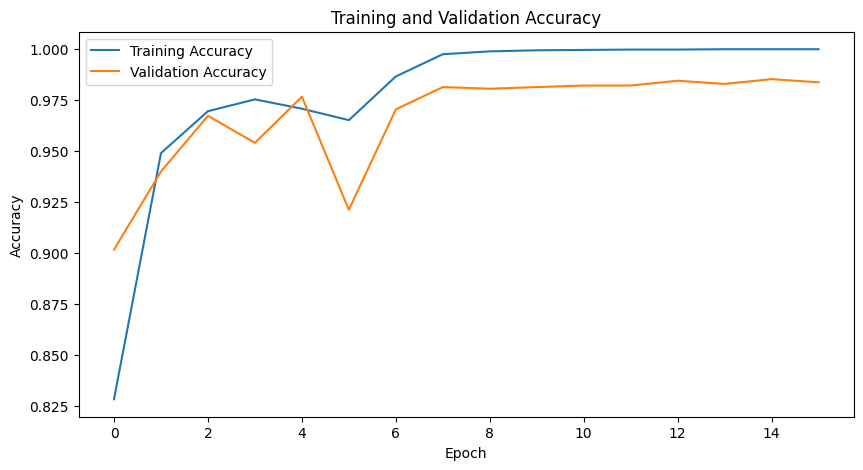

In [15]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(training_accuracy_list, label='Training Accuracy')
plt.plot(validation_accuracy_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

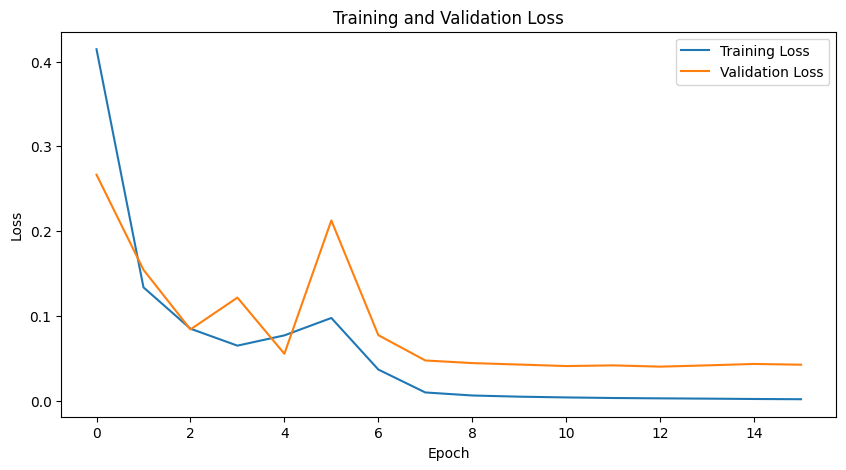

In [16]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(training_loss_list, label='Training Loss')
plt.plot(validation_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

5/5 [==============================] - 0s 8ms/step
Confusion matrix, without normalization
Normalized confusion matrix


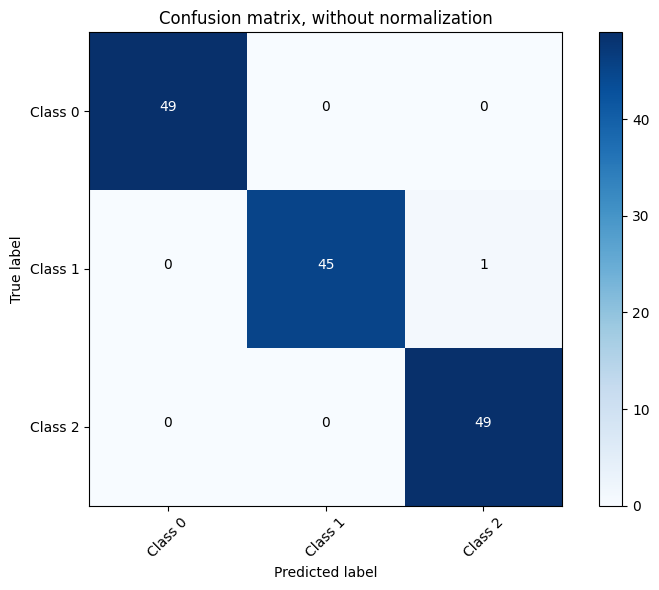

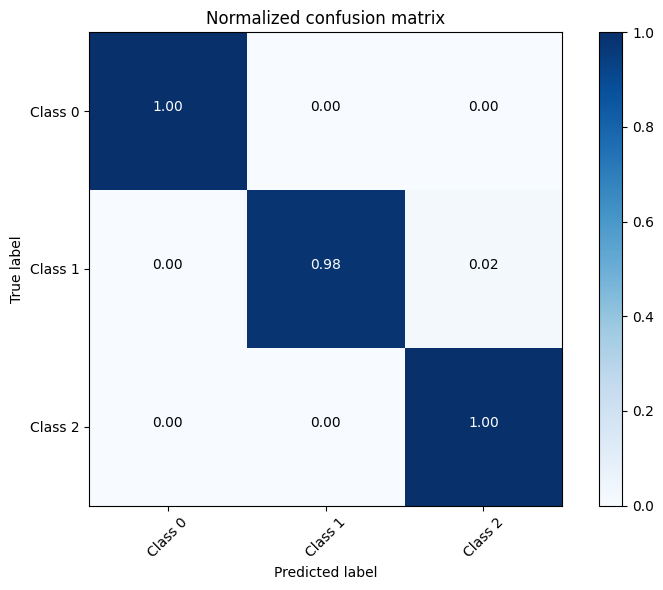

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
model_dir = '/content'
# Load the best model from the saved models directory
best_model_path = os.path.join(model_dir, 'best_model.h5')
best_model = tf.keras.models.load_model(best_model_path)


# Get predictions for test data
predictions = best_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels
true_labels = np.argmax(test_labels, axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=['Class 0', 'Class 1', 'Class 2'], title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=['Class 0', 'Class 1', 'Class 2'], normalize=True, title='Normalized confusion matrix')

plt.show()


5/5 [==============================] - 0s 6ms/step


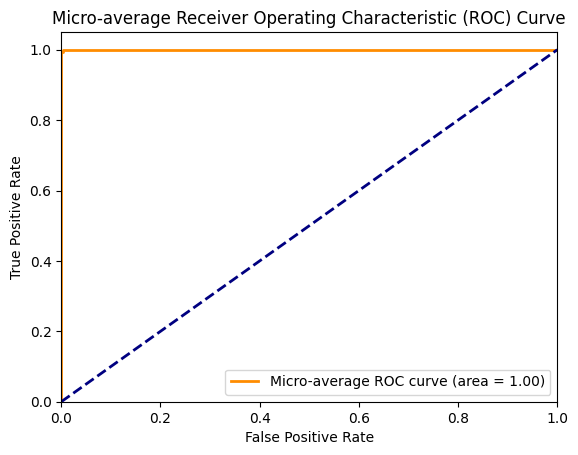

Micro-average Area under the ROC curve (AUC): 0.999975887345679


In [18]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Get predicted probabilities for each class
predicted_probabilities = best_model.predict(test_images)

# Compute ROC curve and ROC area for each class
n_classes = predicted_probabilities.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_labels.ravel(), predicted_probabilities.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange', lw=lw, label='Micro-average ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Micro-average Area under the ROC curve (AUC):", roc_auc["micro"])

In [19]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0